In [1]:
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt

ModuleNotFoundError: No module named 'google.colab'

<b>Each task will be evaluated as 2 points. Apply each for the apple (image_2) </b>
<br> 1) Show red, green, blue chanes of original image separately
<br> 2) Show colour histogram of the image (example: https://datacarpentry.org/image-processing/05-creating-histograms/). 
<br> 3) Apply Gaussian blur from open CV on original image 

In [3]:
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQZLmrg3bB43XuiqbmErCuL-fCJR-mxDih45Q&usqp=CAU' 
image = io.imread(url) 
image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
cv2_imshow(image_2 )


NameError: name 'io' is not defined

In [2]:
#1
red_ch = image_2.copy()
red_ch[:, :, 1] = 0
red_ch[:, :, 2] = 0


green_ch = image_2.copy()
green_ch[:, :, 0] = 0
green_ch[:, :, 2] = 0

blue_ch = image_2.copy()
blue_ch[:, :, 0] = 0
blue_ch[:, :, 1] = 0


NameError: name 'image_2' is not defined

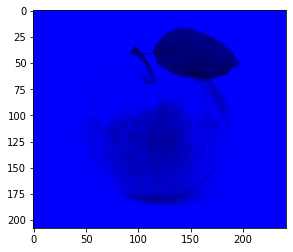

In [ ]:
plt.imshow(blue_ch)

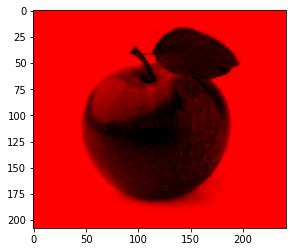

In [ ]:
plt.imshow(red_ch)

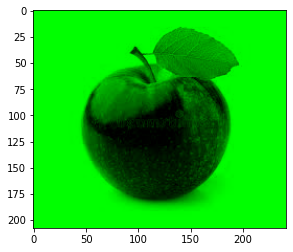

In [ ]:
plt.imshow(green_ch)

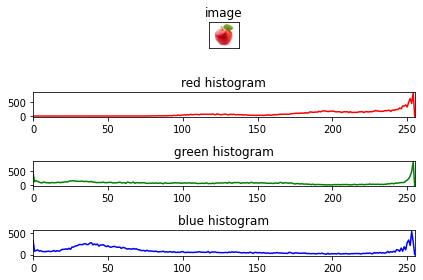

In [ ]:
#2
img = cv.cvtColor(image_2, cv.COLOR_BGR2RGB)
red_hist = cv.calcHist([img], [0], None, [256], [0, 255])
green_hist = cv.calcHist([img], [1], None, [256], [0, 255])
blue_hist = cv.calcHist([img], [2], None, [256], [0, 255])
plt.subplot(4, 1, 1)
plt.imshow(img)
plt.title('image')
plt.xticks([])
plt.yticks([])

plt.subplot(4, 1, 2)
plt.plot(red_hist, color='r')
plt.xlim([0, 255])
plt.title('red histogram')

plt.subplot(4, 1, 3)
plt.plot(green_hist, color='g')
plt.xlim([0, 255])
plt.title('green histogram')

plt.subplot(4, 1, 4)
plt.plot(blue_hist, color='b')
plt.xlim([0, 255])
plt.title('blue histogram')

plt.tight_layout()
plt.show()

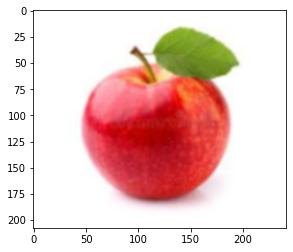

In [ ]:
#3
gaus_blur = cv.cvtColor(image_2, cv.COLOR_BGR2RGB)
gaus_blur = cv.GaussianBlur(gaus_blur,(5,5), 0)
plt.imshow(gaus_blur)

<b> Metrics, 1 point for each calculation. Please use numpy or math operations only. It means, that you need to create each function by you own.</b>
<br>
<br>y - is the data from your dataset
<br>y_pred - is the result of your model 
<br>
Your task is to write functions for calculation 
<br>1. Accuracy 
<br>2. Precision 
<br>3. Recall 
<br>4. F score
<br> Compare results with classification_report from sklearn 



In [4]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from sklearn.metrics import classification_report
random.seed(42)
y = [1,0,0,0,1,0,1,1,1,0]
y_pred = [random.randint(0, 1) for i in range(len(y))]

In [5]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.80      0.62         5
           1       0.50      0.20      0.29         5

    accuracy                           0.50        10
   macro avg       0.50      0.50      0.45        10
weighted avg       0.50      0.50      0.45        10



In [ ]:
# def Accuracy(y,y_pred):
#   Accuracy = 
#   return Accuracy

In [ ]:
# def Precision(y,y_pred):
#   Precision = 
#   return Precision

In [ ]:
# def Recall(y,y_pred):
#   Recall = 
#   return Recall

In [ ]:
# def F score(y,y_pred):
#   F score = 
#   return F score

In [6]:
import numpy as np
import random
from sklearn.metrics import classification_report

def accuracy(y, y_pred):
    return (y == y_pred).sum() / N  #np.mean(y == y_pred ) #or y_pred == y

def precision(y, y_pred):
    TP = ((y_pred == 1) & (y == 1))
    FP = ((y_pred == 1) & (y == 0)).sum() 
    print(y_pred==1)
    print(FP) 
    # true_positives = np.sum((y == 1) & (y_pred == 1) ) #or (y_pred == 1) & (y == 1)
    # false_positives = np.sum((y == 0) & (y_pred == 1))
    # if true_positives + false_positives == 0:
    #     return 0.0
    return TP / (TP+FP)

def recall(y, y_pred):
    true_positives = np.sum((y == 1) == (y_pred == 1) ) #or (y_pred == 1) & (y == 1)
    false_negatives = np.sum((y == 1) & (y_pred == 0))
    if true_positives + false_negatives == 0:
        return 0.0
    return true_positives / (true_positives + false_negatives)

def f_score(y, y_pred, beta=1):
    p = precision(y, y_pred)
    r = recall(y, y_pred)
    if p == 0.00 or r == 0.00:
        return 0.0
    return (1 + beta**2) * (p * r) / ((beta**2 * p) + r)


random.seed(42)
# y = 1
# y_pred = 1
y = np.array([[1,0,0,0,1,0,1,1,1,0]])
# new_y = np.array(y)
y_pred = [random.randint(0, 1) for i in range(len(y))]
N = y.shape[1]


print("Accuracy:", accuracy(y, y_pred))
print("Precision:", precision(y, y_pred))
# print("Recall:", recall(y, y_pred))
# for i in range(len(y)):
#     print(accuracy(y[i], y_pred[i]))
# print('acc------------------------')
# for i in range(len(y)):
#     print(precision(y[i], y_pred[i]))
# print('pre--------------------')
# for i in range(len(y)):
#     print(recall(y[i], y_pred[i]))
# print('rec---------------------------')
# for i in range(len(y)):
#     print(f_score(y[i], y_pred[i]))
# print('f')
# print("F-score:", f_score(y, y_pred))
# print("Classification report:\n", classification_report(y, y_pred))



Accuracy: 0.5
False
0
Precision: [[nan nan nan nan nan nan nan nan nan nan]]


C:\Users\Nitro5\AppData\Local\Temp\ipykernel_18764\1730547244.py:17: RuntimeWarning: invalid value encountered in true_divide
  return TP / (TP+FP)


In [25]:
import numpy as np
import random
random.seed(42)
y = [1,0,0,0,1,0,1,1,1,0]
y_pred = [random.randint(0, 1) for i in range(len(y))]


def accuracy(y, y_pred):
    correct = 0
    for i in range(10):
        if y[i] == y_pred[i]:
            correct += 1
    return correct / len(y)

def precision(y, y_pred):
    true_positives = 0
    false_positives = 0
    for i in range(10):
        if y_pred[i] == 1 and y[i] == 1:
            true_positives += 1
        elif y_pred[i] == 1 and y[i] == 0:
            false_positives += 1
    return true_positives / (true_positives + false_positives)

def recall(y, y_pred):
    true_positives = 0
    false_negatives = 0
    for i in range(10):
        if y_pred[i] == 1 and y[i] == 1:
            true_positives += 1
        elif y_pred[i] == 0 and y[i] == 1:
            false_negatives += 1
    return true_positives / (true_positives + false_negatives)

def f_score(y, y_pred):
    p = precision(y, y_pred)
    r = recall(y, y_pred)
    return 2 * ((p * r) / (p + r))

for i in range(10):
    print(precision(y[i], y_pred[i]))


TypeError: ignored

In [27]:
#РАБОТАЕТ!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

import numpy as np
import random 

random.seed(42)
y = [1,0,0,0,1,0,1,1,1,0]
y_pred = [random.randint(0, 1) for i in range(len(y))]

def accuracy(y, y_pred):
    correct = 0
    for i in range(len(y)):
        if y[i] == y_pred[i]:
            correct += 1
    return correct / len(y)

def precision(y, y_pred, positive_label):
    true_positives = 0
    false_positives = 0
    for i in range(len(y)):
        if y_pred[i] == positive_label:
            if y[i] == positive_label:
                true_positives += 1
            else:
                false_positives += 1
    if true_positives + false_positives == 0:
        return 0
    return true_positives / (true_positives + false_positives)

def recall(y, y_pred, positive_label):
    true_positives = 0
    false_negatives = 0
    for i in range(len(y)):
        if y[i] == positive_label:
            if y_pred[i] == positive_label:
                true_positives += 1
            else:
                false_negatives += 1
    if true_positives + false_negatives == 0:
        return 0
    return true_positives / (true_positives + false_negatives)

def f_score(y, y_pred, positive_label, beta=1):
    p = precision(y, y_pred, positive_label)
    r = recall(y, y_pred, positive_label)
    if p + r == 0:
        return 0
    return (1 + beta**2) * (p * r) / (beta**2 * p + r)


positive_label = 0
recall_score = recall(y, y_pred, positive_label)
print(recall_score)

0.8


In [13]:
accuracy(y, y_pred)

0.5

In [11]:
precision(y, y_pred)

[[False False False False False False False False False False]]
0


<ipython-input-9-faa8b97fed3f>:17: RuntimeWarning: invalid value encountered in true_divide
  return TP / (TP+FP)


array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]])

In [ ]:
recall(y, y_pred)

<ipython-input-64-0bb05df14a88>:12: RuntimeWarning: invalid value encountered in long_scalars
  return tp / (tp + fn)


nan

In [ ]:
f_score(y, y_pred)

<ipython-input-50-569025b5f3d9>:7: RuntimeWarning: invalid value encountered in long_scalars
  return tp / (tp + fp)
<ipython-input-50-569025b5f3d9>:12: RuntimeWarning: invalid value encountered in long_scalars
  return tp / (tp + fn)


nan

Describe difference between maxpooling and convolutional operation (3 points) 

Макс-пулинг и сверточная операция - это два разных способа работы с данными в сверточных нейронных сетях. Сверточная операция используется для поиска особых характеристик в изображении. Например, выделение границ или же текстур. Макс-пулинг же используется для уменьшения размера изображения, чтобы упростить вычисления. 
Таким образом, эти методы помогают нейронной сети обрабатывать изображения быстрее и более эффективно.

Write output of maxpooling layer with kernel size 2 and sride 2 on img1 (You do not need to write function, numbers are enough) (2points)

In [ ]:
img1 = [[1,2,3,4],
       [5,6,7,8],
       [2,4,6,8],
       [1,3,5,7]]

mx_pool = [[6, 8],
           [4,8]]